# Data Visualization

Visualizing data is a really useful way to explore the data, or communicate about it to others. 

There are some great websites out there that explore data visualizations: 

[Eager eyes](https://eagereyes.org/)
[Flowing Data](https://flowingdata.com/)
[visualizing.org][https://www.visualizing.org/]



## Visualizing with spreadsheets 

Spreadsheets allow us to visualize our data rather quickly. They're not very flexible, though. 

We'll use the Google spreadsheets program to explore the Avengers dataset that we created in the previous lesson. You can load the data in and explore it. 

## Visualizing with code: Matplotlib

An alternative is to write Python code that visualizes your data. We'll use the [Matplotlib](https://matplotlib.org/) library to visualize our data. Matplotlib is really flexible, and allows 

But first, we need to organize the data from our file into Python data structures that we can give Matplotlib


In [11]:
from dateutil import parser

file_name = "data/avengers_wiki.csv"

revisions = {}

for line in open(file_name, 'r').readlines()[1:]:
    
    line_list = line.split(',')
    if len(line_list) == 7: 
        title, user, timestamp, size, anon, minor, revid = line_list
        title = title.split('"')[1]
        user = user.split('"')[1]
    else:
        _, title, _, user, rest = line.strip().split('"')
        _, timestamp, size, anon, minor, revid  = rest.split(',')
    
    if title in revisions.keys():
        revisions[title]["user"].append(user)
        revisions[title]["timestamp"].append(parser.parse(timestamp))
        revisions[title]["size"].append(size)
        revisions[title]["anon"].append(anon)
        revisions[title]["minor"].append(minor)
        revisions[title]["revid"].append(revid)
    else:
        revisions[title] = {}
        revisions[title]["user"] = [user]
        revisions[title]["timestamp"] = [parser.parse(timestamp)]
        revisions[title]["size"] = [size]
        revisions[title]["anon"] = [anon]
        revisions[title]["minor"] = [minor]
        revisions[title]["revid"] = [revid]

Next, we import Matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

We might plot the size of the revisions as a function of time for one of the articles (say, "Avengers_(comics)")

In [13]:
times = revisions['Avengers_(comics)']["timestamp"]
size = revisions['Avengers_(comics)']["size"]

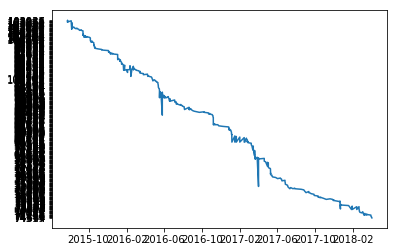

In [14]:
fig, ax = plt.subplots(1)
ax.plot(times, size)

Matplotlib allows us to configure features of the plot rather flexibly:

Text(0,0.5,'Size')

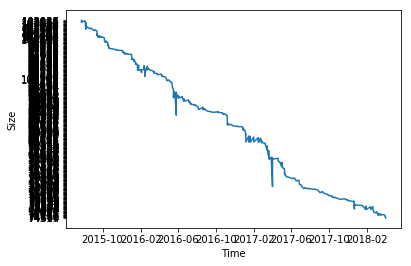

In [15]:
fig, ax = plt.subplots(1)
ax.plot(times, size)
ax.set_xlabel("Time")
ax.set_ylabel("Size")

Another kind of plot is a histogram

In [ ]:
fig, ax = plt.subplots(1)
ax.hist(size)
ax.set_xlabel("Size")
ax.set_ylabel("# of edits")

Text(0,0.5,'# of edits')